## <strong> 14. 결측 데이터 처리

In [1]:
# 필요한 라이브러리
import pandas as pd
import numpy as np

#### <strong> 결측치의 표현: None 객체

In [2]:
# None 객체를 포함한 배열
arr1 = np.array([1, 2, None, 4])
print(arr1.dtype)

# 결측치가 없는 배열
arr2 = np.array([1, 2, 3, 4])
print(arr2.dtype)

object
int64


In [3]:
# Object 객체는 numpy, pandas 연산과 호환되지 않음
arr1.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

#### <strong> 결측치의 표현: NaN 값

In [ ]:
# NaN 값을 포함한 배열 객체
arr3 = np.array([1, np.nan, 3, 4])
arr3.dtype

In [ ]:
# NaN 값에 대한 산술 연산
print(1 + np.nan)
print(0 * np.nan)
print(arr3.sum())

In [ ]:
# NaN값을 무시하는 집계함수(numpy)
print(np.nansum(arr3))
print(np.nanmax(arr3))
print(np.nanmin(arr3))

In [ ]:
# Pandas는 None 객체를 자동으로 NaN값으로 변환한다.

ser = pd.Series([1, np.nan, 2, None])
print(ser)

### <strong> Pandas를 이용한 결측치 처리
---

#### <strong>마스킹을 통한 Null 값 표현
+ ```isnull()```
+ ```notnull()```

In [4]:
# [+] 결측치를 포함한 Series 객체 생성
ser = pd.Series([1, np.nan, 2, None])

In [5]:
# [+] isnull()
ser.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [6]:
# [+] notnull()
ser.notnull()

0     True
1    False
2     True
3    False
dtype: bool

#### <strong> 결측치를 포함한 행 또는 열 삭제
+ dropna()

In [7]:
# DataFrame 생성 함수
def make_df(cols, ind):
    data = {c: [str(c) + str(i) for i in ind]
           for c in cols}

    return pd.DataFrame(data, ind)

df = make_df('ABC', [0, 1, 2])
df

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [8]:
# [+] NaN 값 추가
df.iloc[0, 1] = np.nan
df.iloc[2, 0] = np.nan
df

,A,B,C
0,A0,NaN,C0
1,A1,B1,C1
2,NaN,B2,C2


In [9]:
# [+] 결측치를 포함한 행 삭제
df.dropna(axis=0)

,A,B,C
1,A1,B1,C1


In [10]:
# [+] 결측치를 포함한 열 삭제
df.dropna(axis=1)

,C
0,C0
1,C1
2,C2


In [11]:
# [+] NaN 값 추가
df.iloc[:, 2] = np.nan
df

,A,B,C
0,A0,NaN,NaN
1,A1,B1,NaN
2,NaN,B2,NaN


In [12]:
# [+] NaN값이 한 개라도 포함되면 행 또는 열 삭제
df.dropna(axis=0, how='any')

,A,B,C


In [13]:
# [+] 모든 값이 전부 NaN값인 행 또는 열 삭제
df.dropna(axis=1, how='all')

,A,B
0,A0,NaN
1,A1,B1
2,NaN,B2


In [14]:
# [+] Non-null(정상으로 측정된) 값의 개수가 임계치보다 작은 행을 삭제
df.dropna(axis=0, thresh=2)

,A,B,C
1,A1,B1,NaN


In [15]:
# [+] Non-null 값의 개수가 임계치보다 작은 열을 삭제
df.dropna(axis=1, thresh=2)

,A,B
0,A0,NaN
1,A1,B1
2,NaN,B2


#### <strong> NaN값을 다른 값을 대체
+ ```fillna()```

In [16]:
# Series 객체 생성
ser = pd.Series([1, np.nan, 2, None, 3],
                index=list('abcde'))
ser

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [17]:
# [+] 결측치를 특정 값을 대체
ser.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [18]:
# [+] Forward-fill 방식(= LOCF)
ser.fillna(method='ffill')

C:\Users\67yuh\AppData\Local\Temp\ipykernel_27416\105384142.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ser.fillna(method='ffill')


a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [19]:
# [+] Backward-fill 방식(= NOCB)
ser.fillna(method='bfill')

C:\Users\67yuh\AppData\Local\Temp\ipykernel_27416\2466028385.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ser.fillna(method='bfill')


a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

### <strong> 결측치 처리 예제: Air Quality 데이터셋

In [20]:
from datetime import datetime
from matplotlib import pyplot as plt

"""
Load AirQualityUCI Data
"""

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

input_file = './data/AirQualityUCI_refined.csv'

df = pd.read_csv(input_file,
                 index_col=[0],
                 parse_dates=[0],
                 date_parser=parser)

C:\Users\67yuh\AppData\Local\Temp\ipykernel_27416\1865652950.py:13: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(input_file,


In [21]:
# 데이터 요약
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         7765 non-null   float64
 1   PT08.S1(CO)    8991 non-null   float64
 2   PT08.S2(NMHC)  8991 non-null   float64
 3   NOx(GT)        7718 non-null   float64
 4   PT08.S3(NOx)   8991 non-null   float64
 5   NO2(GT)        7715 non-null   float64
 6   PT08.S4(NO2)   8991 non-null   float64
 7   PT08.S5(O3)    8991 non-null   float64
 8   RH             8991 non-null   float64
 9   AH             8991 non-null   float64
 10  C6H6(GT)       9357 non-null   float64
dtypes: float64(11)
memory usage: 877.2 KB


In [21]:
# 시각화 설정 옵션
%matplotlib qt5
%config InlineBackend.figure_format = 'svg'

plt.rcParams['figure.figsize'] = [12, 5]
plt.rcParams['font.size'] = 13
plt.ion()

ImportError: Failed to import any of the following Qt binding modules: PyQt5, PySide2

In [23]:
!pip install missingno

   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
    --------------------------------------- 0.8/44.5 MB 2.8 MB/s eta 0:00:16
   - -------------------------------------- 1.6/44.5 MB 3.4 MB/s eta 0:00:13
   -- ------------------------------------- 2.4/44.5 MB 3.5 MB/s eta 0:00:12
   --- ------------------------------------ 3.7/44.5 MB 4.1 MB/s eta 0:00:10
   ---- ----------------------------------- 4.7/44.5 MB 4.3 MB/s eta 0:00:10
   ----- ---------------------------------- 5.8/44.5 MB 4.4 MB/s eta 0:00:09
   ------ --------------------------------- 6.8/44.5 MB 4.5 MB/s eta 0:00:09
   ------- -------------------------------- 7.9/44.5 MB 4.6 MB/s eta 0:00:08
   -------- ------------------------------- 8.9/44.5 MB 4.7 MB/s eta 0:00:08
   --------- ------------------------------ 10.2/44.5 MB 4.7 MB/s eta 0:00:08
   ---------- ----------------------------- 11.3/44.5 MB 4.8 MB/s eta 0:00:07
   ----------- ---------------------------- 12.3/44.5 MB 4.8 MB/s eta 0:00:07
   

In [25]:
# 결측 데이터 시각화
import missingno

missingno.matrix(df)

ModuleNotFoundError: No module named 'missingno'

<Axes: xlabel='Datetime'>

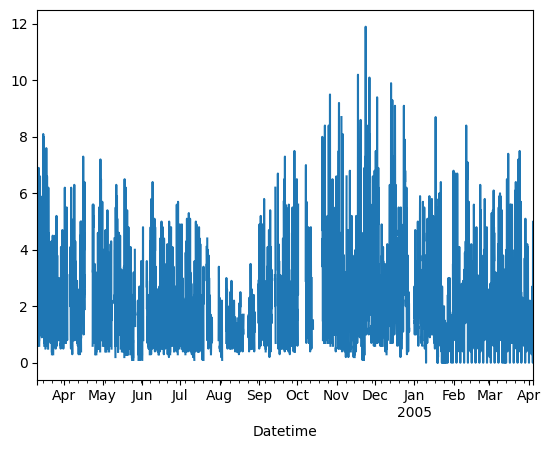

In [26]:
# 일산화탄소(CO) 시계열 시각화
df['CO(GT)'].plot()

In [27]:
# 결측치 대치
imp_locf = df['CO(GT)'].copy().ffill() # LOCF
imp_nocb = df['CO(GT)'].copy().bfill() # NOCB
imp_linear = df['CO(GT)'].copy().interpolate() # 선형 보간
imp_mean = df['CO(GT)'].copy().fillna(df['CO(GT)'].mean())  # 평균값 대체

In [29]:
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [28]:
# K-NN 대치
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)    # default: 2
imp_knn = df.copy().values
imp_knn = imputer.fit_transform(imp_knn)

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# K-NN 대치 결과 변환(ndarray -> DataFrame)
imp_df = pd.DataFrame(imp_knn, index=imp_locf.index, columns=df.columns)

In [ ]:
# 결측치 처리 결과 시각화
plt.plot(df['CO(GT)'], label='actual', zorder=10)
plt.plot(imp_linear, label='linear interpolation', zorder=3)
plt.plot(imp_nocb, label='nocb', zorder=2)
plt.plot(imp_locf, label='locf', zorder=1)
plt.plot(imp_mean, label='mean substitution', zorder=4)
plt.plot(imp_df['CO(GT)'], label='k-nearest neighbor', zorder=5)
plt.legend(loc='best')
plt.show()